In [1]:
#@title Add the Model folder to the Path to allow Imports
import sys
import os
os.chdir('..')
os.chdir('..')
sys.path.append(os.path.join(os.getcwd()))

In [2]:
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
from datasets.kuka_dataset.KukaDataset import KukaDataset
import pandas as pd
import numpy as np
import torch

In [3]:

#TRAIN
DATA_DIR = os.path.join(os.getcwd(),"datasets/kuka_dataset/normal")
#TEST
TEST_DATA_DIR = os.path.join(os.getcwd(),"datasets/kuka_dataset/collisions")


In [4]:
os.listdir(DATA_DIR)

['dataset.csv',
 'rec0_20220811_rbtc_0.005s.csv',
 'rec0_20220811_rbtc_0.005s.metadata',
 'rec0_20220811_rbtc_0.01s.csv',
 'rec0_20220811_rbtc_0.01s.metadata',
 'rec0_20220811_rbtc_0.1s.csv',
 'rec0_20220811_rbtc_0.1s.metadata',
 'rec0_20220811_rbtc_1.0s.csv',
 'rec0_20220811_rbtc_1.0s_metadata.csv',
 'rec2_20220811_rbtc_0.005s.csv',
 'rec2_20220811_rbtc_0.005s.metadata',
 'rec2_20220811_rbtc_0.01s.csv',
 'rec2_20220811_rbtc_0.01s.metadata',
 'rec2_20220811_rbtc_0.1s.csv',
 'rec2_20220811_rbtc_0.1s.metadata',
 'rec2_20220811_rbtc_1.0s.csv',
 'rec2_20220811_rbtc_1.0s.metadata',
 'rec3_20220811_rbtc_0.005s.csv',
 'rec3_20220811_rbtc_0.005s.metadata',
 'rec3_20220811_rbtc_0.01s.csv',
 'rec3_20220811_rbtc_0.01s.metadata',
 'rec3_20220811_rbtc_0.1s.csv',
 'rec3_20220811_rbtc_0.1s.metadata',
 'rec3_20220811_rbtc_1.0s.csv',
 'rec3_20220811_rbtc_1.0s.metadata',
 'rec4_20220811_rbtc_0.005s.csv',
 'rec4_20220811_rbtc_0.005s.metadata',
 'rec4_20220811_rbtc_0.01s.csv',
 'rec4_20220811_rbtc_0.01s.m

In [5]:
train_dataset = KukaDataset(DATA_DIR)

TypeError: 'NoneType' object is not subscriptable

In [31]:
test_dataset = KukaDataset(TEST_DATA_DIR, test=True, columns_to_keep=train_dataset.kept_columns)

--- Test Dataset ---
Grouping by Chassis id


In [32]:
test_dataset.kuka_df.head()

,Timesteps,ChassisId_encoded,gen,af1__0,af1__1,af1__2,af1__3,af1__4,af1__5,af1__6,...,f__233,f__234,f__235,f__236,f__237,f__238,f__239,f__240,f__241,f__242
0,0.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,...,0.228181,2.260611,0.443237,-0.173428,-0.490855,0.027760,-0.007520,0.111756,0.713604,-0.108912
1,1.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,...,0.228181,2.260611,0.443237,-0.150103,-0.490656,0.016915,-0.012925,0.126104,0.752002,-0.106688
2,2.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,...,0.228181,2.260611,0.443237,-0.136927,-0.491369,0.014565,-0.015026,0.126458,0.764391,-0.105829
3,3.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,...,0.228181,2.260611,0.443237,-0.127777,-0.489940,0.016210,-0.015648,0.125425,0.760781,-0.105922
4,4.0,181.0,gen2,0.001572,0.000074,0.009537,2.436562e-07,0.005458,0.005413,0.003982,...,0.228181,2.260611,0.443237,-0.112876,-0.491121,0.014534,-0.016847,0.127709,0.782974,-0.101559


In [33]:
test_dataset.get_n_features(), train_dataset.get_n_features()

(578, 578)

In [34]:
train_dataloader = DataLoader( train_dataset, batch_size = 12, collate_fn = KukaDataset.padding_collate_fn)
test_dataloader = DataLoader( test_dataset, batch_size = 12, collate_fn = KukaDataset.padding_collate_fn)



In [42]:
y = [train_dataset[i][1] for i in range(len(train_dataset))]
y = torch.concat(y)
y = torch.argmax(y, dim=1)
y = y.numpy()
weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
weights

array([6.28039732, 0.36585519, 9.30643731])

In [ ]:
y = [torch.sum(train_dataset[i][1], dim=0) for i in range(len(train_dataset))]

In [8]:
train_dataset.df_list[4].shape

(13, 293)

In [9]:
for batch in train_dataloader:
    data, labels, mask = batch
    print("BEFORE")
    print(f"mask: {mask.shape}")
    print(f"data: {data.shape}")
    print(f"labels: {labels.shape}")
    
    
    mask = mask.reshape(-1)
    data = data.reshape(-1)
    labels = labels.reshape(-1,3)
    print("AFTER")    
    print(f"mask: {mask.shape}")
    print(f"data: {data.shape}")
    print(f"labels: {labels.shape}")
    
    labels = labels[ mask.type(torch.bool) ]
    
    res_df = pd.DataFrame(train_dataset.risk_encoder.inverse_transform(labels), columns=["pred"])
    #res_df.to_csv("shit.csv", index=False)
    print(mask.sum())
    break
    

BEFORE
mask: torch.Size([12, 29])
data: torch.Size([12, 29, 289])
labels: torch.Size([12, 29, 3])
AFTER
mask: torch.Size([348])
data: torch.Size([100572])
labels: torch.Size([348, 3])
tensor(245.)


In [10]:
for batch in test_dataloader:
    pass


In [11]:
import numpy as np

a = np.arange(10).reshape((5,2))
print(a)

b = a - np.roll(a, 1, axis=0)
b[0, :] = 0
b

c = np.hstack([a,b])
c

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


array([[0, 1, 0, 0],
       [2, 3, 2, 2],
       [4, 5, 2, 2],
       [6, 7, 2, 2],
       [8, 9, 2, 2]])

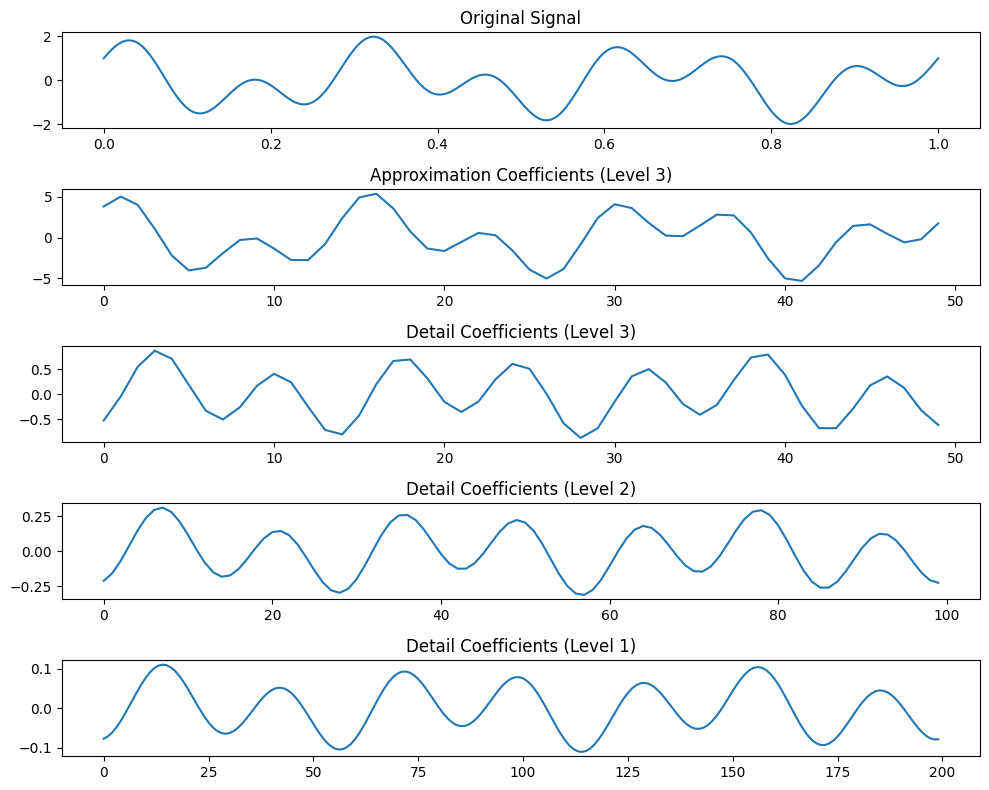

In [54]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 400  # Sampling frequency
t = np.linspace(0, 1, fs)
signal = np.sin(2 * np.pi * 7 * t) + np.cos(2 * np.pi * 3 * t)

# Perform DWT
wavelet = 'db1'  # Daubechies wavelet with 1 vanishing moment
coeffs = pywt.wavedec(signal, wavelet, level=3)

# Extract approximation and detail coefficients
cA3, cD3, cD2, cD1 = coeffs

# Plot the original signal and its wavelet decomposition
plt.figure(figsize=(10, 8))

plt.subplot(5, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

plt.subplot(5, 1, 2)
plt.plot(cA3)
plt.title('Approximation Coefficients (Level 3)')

plt.subplot(5, 1, 3)
plt.plot(cD3)
plt.title('Detail Coefficients (Level 3)')

plt.subplot(5, 1, 4)
plt.plot(cD2)
plt.title('Detail Coefficients (Level 2)')

plt.subplot(5, 1, 5)
plt.plot(cD1)
plt.title('Detail Coefficients (Level 1)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

def wavelet_spectrogram(df, n, wavelet='db1'):
    """
    Perform wavelet transformation on each column of the input DataFrame and return a DataFrame with the wavelet spectrogram.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with time series data.
    n (int): Number of scales to use for the wavelet transformation.
    wavelet (str): Type of wavelet to use (default is 'db1').
    
    Returns:
    pd.DataFrame: DataFrame with wavelet spectrograms, columns as signal_x_scale_y.
    """
    wavelet = pywt.Wavelet(wavelet)
    
    # Check if n is valid
    if n < 1:
        raise ValueError("Number of scales (n) must be at least 1.")
    
    num_samples = df.shape[0]
    num_features = df.shape[1]
    
    # Initialize a list to store the column names
    columns = []
    
    # Initialize a 2D array to store the wavelet spectrograms
    spectrogram = np.zeros((num_samples, num_features * (n - 1)))
    
    # Loop through each column in the DataFrame
    for i, col in enumerate(df.columns):
        series = df[col].values
        
        # Perform discrete wavelet transform up to the specified number of scales
        coeffs = pywt.wavedec(series, wavelet, level=n-1)
        
        # Add each level of detailed coefficients to the spectrogram
        for j in range(1, n):
            # Resize the coefficients to match the original series length
            cD = pywt.upcoef('d', coeffs[j], wavelet, take=num_samples)
            if len(cD) < num_samples:
                cD = np.pad(cD, (0, num_samples - len(cD)), 'constant')
            spectrogram[:, i * (n - 1) + (j - 1)] = cD
            columns.append(f'{col}_wavelet_scale_{j}')
    
    # Create the DataFrame
    spectrogram_df = pd.DataFrame(spectrogram, columns=columns)
    
    return spectrogram_df

def plot_wavelet_spectrograms(data, spectrogram_df, n):
    """
    Plot each column of the input data and its wavelet spectrogram.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame with time series data.
    spectrogram_df (pd.DataFrame): DataFrame with wavelet spectrogram data.
    n (int): Number of scales used for the wavelet transformation.
    """
    num_samples = data.shape[0]
    num_features = data.shape[1]
    time = np.arange(num_samples)
    
    for i, col in enumerate(data.columns):
        fig, axes = plt.subplots(n, 1, figsize=(10, 2 * n))
        
        # Plot the original time series
        axes[0].plot(time, data[col].values)
        axes[0].set_title(f'Time Series - Column {col}')
        
        # Plot the wavelet spectrograms
        for j in range(1, n):
            scale_data = spectrogram_df.iloc[:, j].values
            axes[j].imshow(scale_data.reshape(-1, 1).T, aspect='auto', 
                           extent=[0, num_samples, 0, 1], cmap='viridis')
            axes[j].set_title(f'Wavelet Coefficients - Scale {j}')
        
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    samples = 128
    data = {
        'A': np.sin(np.linspace(0, 8 * np.pi, samples))+ np.cos(np.linspace(0, 32 * np.pi, samples))
    }
    df = pd.DataFrame(data)
    
    # Perform wavelet transform and get the spectrogram with 5 scales
    n = 5
    spectrogram_df = wavelet_spectrogram(df, n)
    print(spectrogram_df)
    
    # Plot each column and its spectrogram
    plot_wavelet_spectrograms(df, spectrogram_df, n)


NameError: name 'N' is not defined

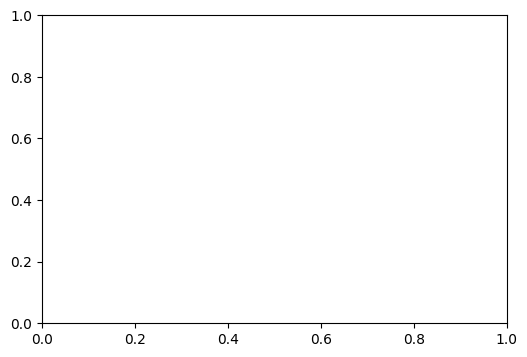

In [49]:
import scipy.signal as signal
from scipy.signal.windows import gaussian
g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(10, std=g_std, sym=True)  # symmetric Gaussian window

t = np.arange(1,32)
x = np.sin(t/(np.pi))

SFT = signal.ShortTimeFFT(w, hop=10, fs=1, mfft=200, scale_to='magnitude')
Sx = SFT.stft(x)  # perform the STFT

In [53]:
from sklearn.preprocessing import MinMaxScaler

a = np.array([[1,100,1000],
          [2,200,2000],
          [3,300,3000]])
df = pd.DataFrame(a, columns=['a','b','c'])
df2 = pd.DataFrame(a, columns=['a','b','c'])
# mm = MinMaxScaler()
# mm.fit_transform(df)
pd.concat([df,df2],axis=0,ignore_index=True)

,a,b,c
0,1,100,1000
1,2,200,2000
2,3,300,3000
3,1,100,1000
4,2,200,2000
5,3,300,3000


In [59]:
train_dataset = KukaDataset(DATA_DIR)

--- Train Dataset ---
preprocessing ... 
Dropping all NaN column
Dropping all static columns


Group and feature extraction: 100%|██████████| 7280/7280 [00:00<00:00, 35841.64it/s]


Scaling features...done
6207


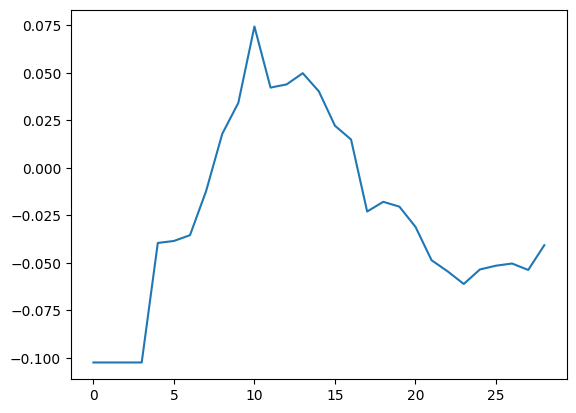

(29,)
(29, 99)


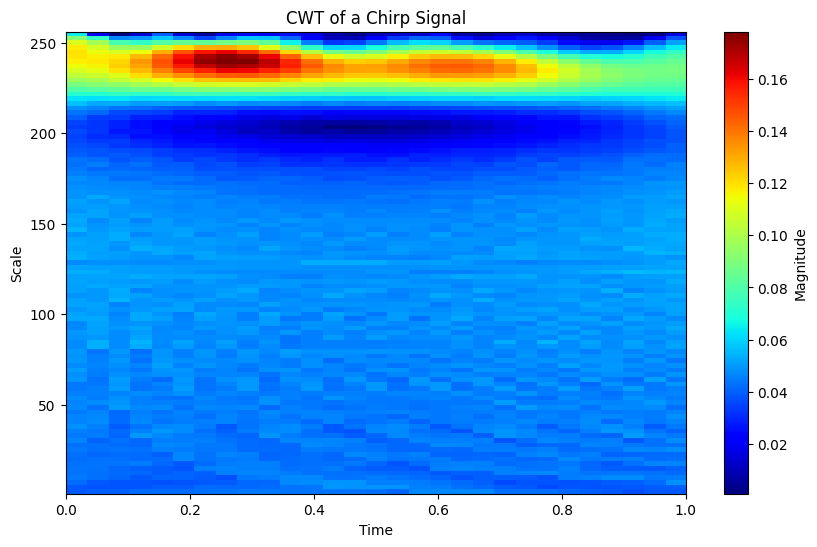

In [123]:
import pywt
from scipy.interpolate import griddata

signal = train_dataset[1][0][:, 109].numpy()
plt.plot(signal)
plt.show()

# Apply CWT
coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 100), wavelet='cgau1')

print(signal.shape)
print(np.abs(coefficients).T.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 256])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of a Chirp Signal")
plt.show()


        num_repeats = np.power(2, len(coeff)-1)
        repeated = np.repeat(coeff[0], num_repeats)
        mycoeff[0] = repeated[:num_samples]
        for j in range(1, len(coeff)):
            num_repeats = np.power(2, len(coeff)-j)
            repeated = np.repeat(coeff[j], num_repeats)
            mycoeff[j] = repeated[:num_samples]


In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

num_samples = 29
t = np.arange(0,num_samples,1)
s = np.cos(6*t/(2*np.pi))+ np.sin(2*t/(2*np.pi)) + np.sin(7*t/(2*np.pi)) + np.sin(5*t/(2*np.pi)) + np.random.standard_normal(size=num_samples)/10
plt.plot(s)
plt.show()
wavelet='db1'

coeffs = pywt.wavedec(num_samples, wavelet, level=4)
        
mycoeff = np.zeros((5, num_samples))
coeff = sorted(coeffs, key=lambda l:-len(l))

for i in range(len(coeff)-1):
    num_repeats = np.power(2, i+1)
    repeated = np.repeat(coeff[i], num_repeats)
    mycoeff[i] = repeated[:num_samples]
num_repeats = np.power(2, len(coeff)-1)
repeated = np.repeat(coeff[-1], num_repeats)
mycoeff[len(coeff)-1] = repeated[:num_samples]

plt.imshow(mycoeff, aspect='auto', cmap='viridis')
plt.show()